In [16]:
pip install fake-useragent

In [18]:
# Create an user agent pip install fake-useragent
#A user agent acts as a bridge between the user and the internet
#It gives the web server necessory information about browser, software, device type and etc.
#According to this information web server can display different web pages for you
# The web server can uses this information to adapt the content to specific web browser and differnt OS
user_agent=UserAgent()
print(user_agent)

In [27]:
# Import required libraries
import requests
import bs4
from bs4 import BeautifulSoup

from fake_useragent import UserAgent

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Initialization of the list to store the extracted data
# The data that we extract is unstructured data, so we will create empty list to store them in a structured form

count=0

products=[]
prices=[]
ratings=[]

# specification=[]
cpu=[]
ram=[]
os=[]
hd=[]
display=[]
df=pd.DataFrame()

In [29]:
# Set the product name, We are searching for Laptop
# The extracted data will related to that product, we are searching fir it \
product_name='laptop'


In [30]:
# Step1 - find URl
url="https://www.flipkart.com/search?q={0}&page={1}"
print(url.format(product_name,1))

https://www.flipkart.com/search?q=laptop&page=1


In [31]:
for i in range(1,2):
    url="https://www.flipkart.com/search?q={0}&page={1}"
    url=url.format(product_name,i)
    
    print(url)
    
    page=requests.get(url)
    print(page)
    
    html=page.content
    #print(html)
    
    page_soup=bs4.BeautifulSoup(html,"html.parser")
    print(page_soup.prettify())

https://www.flipkart.com/search?q=laptop&page=1
<Response [200]>
<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app_modules.chunk.94b5e7.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.dd97f3.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.c

In [32]:
# in the above page one is extracted
# extract data from multiple pages of the product listing, we are going to use a for loop
# The range will specify the number of pages to be extracted

In [33]:
for i in range(1,4): #Limiting search to 3 pages due to multiple redirection issue for higher number
    url="https://www.flipkart.com/search?q={0}&page={1}"
    url=url.format(product_name,i)
    
    print(url)
    
    # Getting the response from the page using get method of request module
    #page=request.get
    page=requests.get(url)
    print(page)
    
    html=page.content
   # print(html)
    
    page_soup=bs4.BeautifulSoup(html,'html.parser')
    
    for containers in page_soup.findAll('a',{'class':'_1fQZEK'}):
        name=containers.find('div',attrs={'class':'_4rR01T'})
        price=containers.find('div',attrs={'class':'_30jeq3 _1_WHN1'})
        rating=containers.find('div',attrs={'class':'_3LWZlK'})
        specification=containers.find('div',attrs={'class':'fMghEO'})
        
        
        for col in specification:
            col=col.find_all('li',attrs={'class':'rgWa7D'})
            cput=col[0].text
            ramt=col[1].text
            ost=col[2].text
            hddt=col[3].text
            displayt=col[4].text
            
        products.append(name.text)
        prices.append(price.text)
        cpu.append(cput)
        ram.append(ramt)
        os.append(ost)
        hd.append(hddt)
        display.append(displayt)
        ratings.append(rating.text) if type(rating) == bs4.element.Tag else ratings.append('NaN')
        
        count=count+1
        
    df = pd.DataFrame({'Product Name':products,'CPU':cpu,'RAM':ram,'OS':os,'HD capacity':hd,'Display':display,'price':prices,'Rating':ratings})
   
print('No. of rows searched',count )

https://www.flipkart.com/search?q=laptop&page=1
<Response [200]>
https://www.flipkart.com/search?q=laptop&page=2
<Response [200]>
https://www.flipkart.com/search?q=laptop&page=3
<Response [200]>
No. of rows searched 72


In [34]:
print(df.shape)
df.head()

(72, 8)


,Product Name,CPU,RAM,OS,HD capacity,Display,price,Rating
0,ASUS ROG Strix Ryzen 7 Octa Core 4800H - (8 GB...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"₹78,990",4.6
1,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"₹41,990",4.2
2,HP Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,"₹39,990",4.3
3,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,"₹40,990",4.5
4,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Touchscreen Display,"₹39,990",4.2


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  72 non-null     object
 1   CPU           72 non-null     object
 2   RAM           72 non-null     object
 3   OS            72 non-null     object
 4   HD capacity   72 non-null     object
 5   Display       72 non-null     object
 6   price         72 non-null     object
 7   Rating        72 non-null     object
dtypes: object(8)
memory usage: 4.6+ KB


In [36]:
df.tail()

,Product Name,CPU,RAM,OS,HD capacity,Display,price,Rating
67,APPLE MacBook Air M1 - (8 GB/512 GB SSD/Mac OS...,Apple M1 Processor,8 GB DDR4 RAM,Mac OS Operating System,512 GB SSD,33.78 cm (13.3 inch) Display,"₹1,09,990",4.7
68,DELL INSPIRON Core i3 10th Gen - (8 GB/1 TB HD...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,"₹42,490",4.1
69,ASUS ASUS TUF Gaming Core i5 11th Gen - (8 GB/...,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,39.62 cm (15.6 inch) Display,"₹79,990",4.5
70,Lenovo ThinkPad E14 Gen2 Ryzen 5 Hexa Core 465...,AMD Ryzen 5 Hexa Core Processor (5th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,"₹53,990",4.3
71,Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen...,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,"₹53,990",4.2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  72 non-null     object
 1   CPU           72 non-null     object
 2   RAM           72 non-null     object
 3   OS            72 non-null     object
 4   HD capacity   72 non-null     object
 5   Display       72 non-null     object
 6   price         72 non-null     object
 7   Rating        72 non-null     object
dtypes: object(8)
memory usage: 4.6+ KB


In [38]:
df['price']=df['price'].str.lstrip('₹')
df['price']=df['price'].replace({',':''}, regex=True)
df.head()

,Product Name,CPU,RAM,OS,HD capacity,Display,price,Rating
0,ASUS ROG Strix Ryzen 7 Octa Core 4800H - (8 GB...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,78990,4.6
1,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,41990,4.2
2,HP Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,39990,4.3
3,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,40990,4.5
4,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Touchscreen Display,39990,4.2


In [39]:
df.iloc[:,6]=df.iloc[:,6].astype(float)
df.iloc[:,7]=df.iloc[:,7].astype(float)

df.head()

,Product Name,CPU,RAM,OS,HD capacity,Display,price,Rating
0,ASUS ROG Strix Ryzen 7 Octa Core 4800H - (8 GB...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,78990.0,4.6
1,HP Core i3 11th Gen - (8 GB/512 GB SSD/Windows...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,41990.0,4.2
2,HP Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,39990.0,4.3
3,ASUS VivoBook 15 (2021) Core i3 10th Gen - (8 ...,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,40990.0,4.5
4,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 inch) Touchscreen Display,39990.0,4.2


In [40]:
df.isnull().sum()

Product Name    0
CPU             0
RAM             0
OS              0
HD capacity     0
Display         0
price           0
Rating          1
dtype: int64

In [41]:
df.isna().sum()

Product Name    0
CPU             0
RAM             0
OS              0
HD capacity     0
Display         0
price           0
Rating          1
dtype: int64

In [42]:
df.describe()

,price,Rating
count,72.000000,71.000000
mean,58298.402778,4.366197
std,18445.539706,0.217087
min,33990.000000,3.500000
25%,42955.000000,4.300000
50%,55990.000000,4.400000
75%,66096.000000,4.500000
max,112990.000000,5.000000


In [43]:
df1=df.dropna()

In [44]:
df1.shape

(71, 8)

In [45]:
df1.dtypes

Product Name     object
CPU              object
RAM              object
OS               object
HD capacity      object
Display          object
price           float64
Rating          float64
dtype: object

In [46]:
#Identify rows with wrongly positioned data i.e. perticular data misplaced under a different column
a=df1[(~df1['CPU'].str.contains('Processor'))|
    (~df1['RAM'].str.contains('RAM'))|
    (~df1['OS'].str.contains('Operating'))|
    (~df1['HD capacity'].str.contains('GB|TB'))].index
a
print(a)

Int64Index([27, 42, 61], dtype='int64')


In [47]:
df1=df1.drop(a,axis=0)

In [48]:
df1.shape

(68, 8)

In [49]:
#save cleaned and processed data to a csv file
df1.to_csv('WebScrapingLaptops.csv',index=False)

# Exploratory Data Analysis

## Univariate analysis plot histogram and Boxplots

In [50]:
# In univariate analysis tells you how the values and categories are distributed in the dataset
# Numeric values should follow a normal distribution

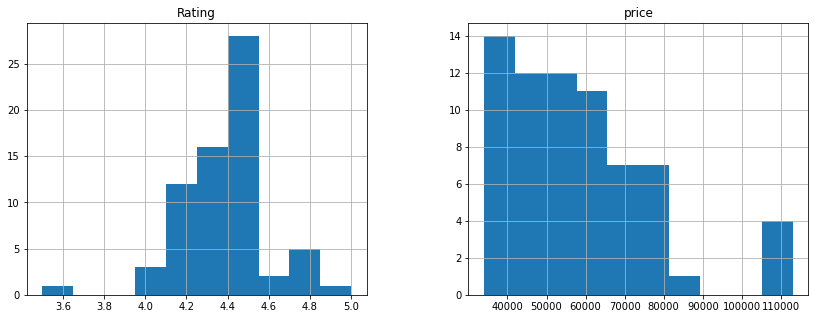

In [51]:
# Plot histogram of price and rating
df1.hist(figsize=(14,5))
plt.show()

In [26]:
* Prices of most laptops is in between 35000 to 65000
* Ratings of most laptop is in beteen 4.1 to 4.5
* You can pull out the row rom dataset where rating is less then 4?

SyntaxError: invalid syntax (<ipython-input-26-c5fbd87a4ea1>, line 1)

In [52]:
df1[df1['Rating']<3.9]

,Product Name,CPU,RAM,OS,HD capacity,Display,price,Rating
21,ASUS Core i3 10th Gen - (4 GB/1 TB HDD/Windows...,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,33990.0,3.5


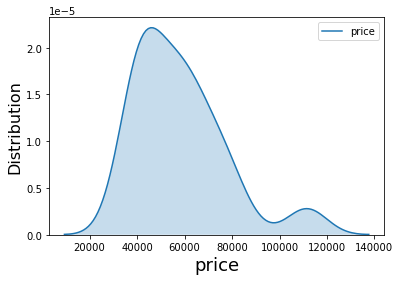

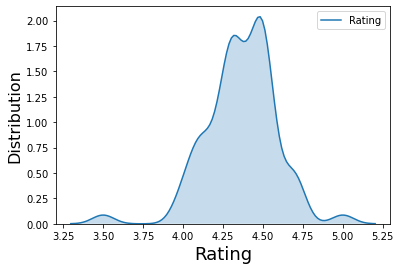

In [53]:
# Plot distribution plot of price and rating with sns
# combine using subplot from matplotlib
figsize=(16,6)
columns=['price','Rating']
for i in columns:
    sns.kdeplot(df1[i],shade=True)
   # sns.histplot(df1[i],kde=True)
    plt.xlabel(i,fontsize=18)
    plt.ylabel('Distribution',fontsize=16)
    plt.show()

In [30]:
## Draw a histogram for price and ratings using subplots and hist() from matplotlib


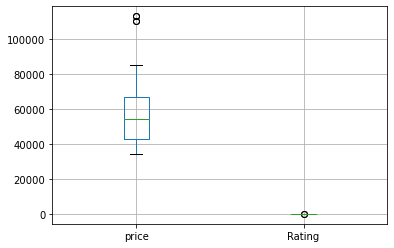

In [54]:
# Box plot of price using dataframe method
# Another type of univariate abnalysis is box plot
# It helps to identify outliers
#presence Outliers tends to reduce accuracy in predictive analysis
# Advantage of dataframe is it does for all numeric columns: less lines of code
df1.boxplot()
#df1.boxplot('price')
plt.show()

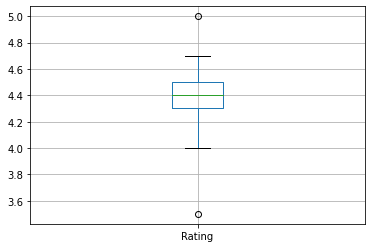

In [55]:
df1.boxplot('Rating')
plt.show()

In [31]:
* Decide to ratain or drop outliers
* The outliers above the upper whiskers are clamped to the upper whiskers


SyntaxError: invalid syntax (<ipython-input-31-c4c2ceed7e9c>, line 1)

# Bivariate analtysis

   ### Draw scatterplot to see relationship between two continious variables
  ### Draw barplots or boxplots to see relation between a categorical and a continous variable


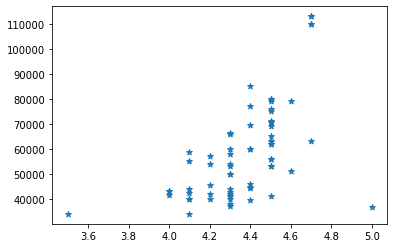

In [56]:
# Scatter plot rating vs price
plt.scatter("Rating","price",data=df1,marker='*')
plt.show()

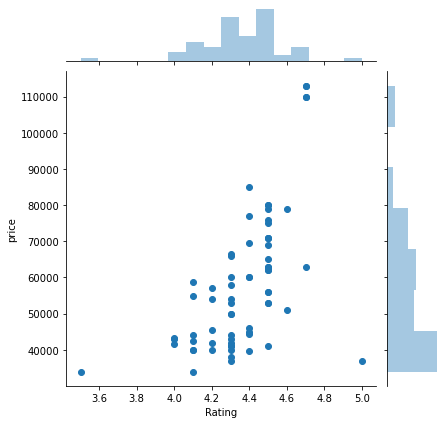

In [57]:
sns.jointplot('Rating','price',data=df1,kind='scatter')
plt.show()

In [47]:
* Joinplot help you to see the relation between two values along with there distribution
* Since we have only data for a computer with price 110000

SyntaxError: invalid syntax (<ipython-input-47-72c56d9110d3>, line 1)

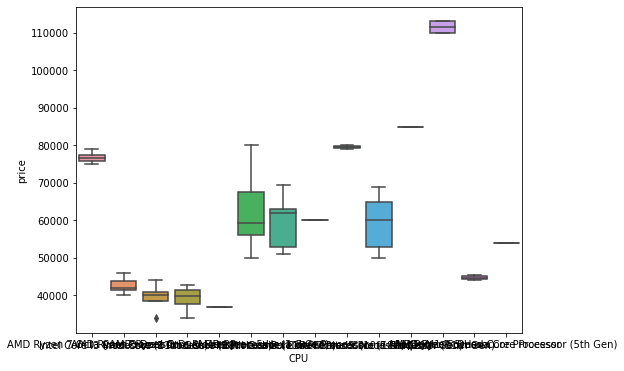

In [58]:
# Is there any relationship between CPU and price?
# First think the type of variable CPU is categorical/object and price is numeric
# We can draw a boxplot 
# Boxplot of CPU and  price using seaborn library
# Seaborn is written specifically for plots for data in a dataframe its input is cols of dataframe
# Matplotlib the input plots are numpy array

plt.figure(figsize=(8,6))
sns.boxplot(x="CPU",y="price",data=df1)
plt.show()

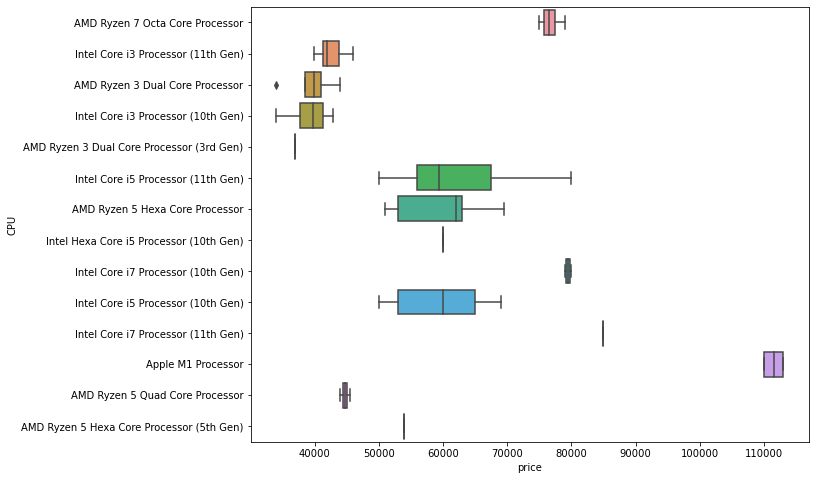

In [59]:
#Name on x-axis become very clumsy so interchange the x and y axis
plt.figure(figsize=(10,8))
sns.boxplot(y='CPU',x='price',data=df1)
plt.show()

In [60]:
* Observations 
* Intel i7, AMD octa core, apple m1 processors are expensive
* Intel i3, AMD quad core processors are less in price
* Intel i5 processors are middle in range 

SyntaxError: invalid syntax (<ipython-input-60-c7b41def6bfd>, line 2)

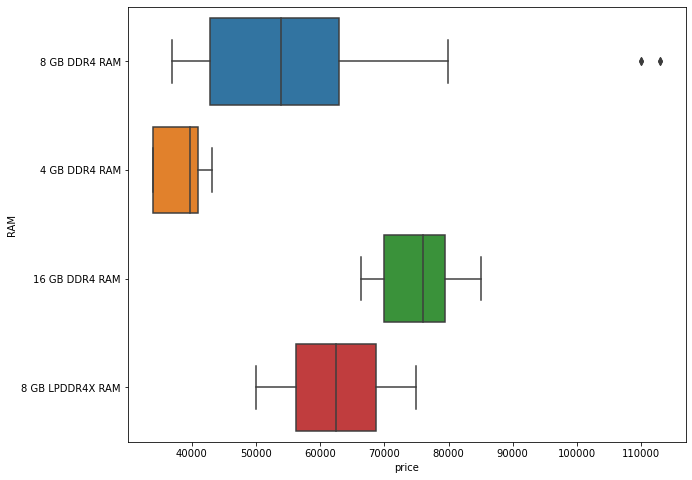

In [60]:
# Box plot of Ram and price
plt.figure(figsize=(10,8))
sns.boxplot(y='RAM',x='price',data=df1)
plt.show()

In [64]:
* Observations

*16 GB DDR4 ram has a higher median  price
* When you derive a conclusion look at the median line to see the dependance of price on RAM
* If all median lines are at same level, we say price is independant of  RAM

SyntaxError: invalid syntax (<ipython-input-64-ece4723c1326>, line 3)

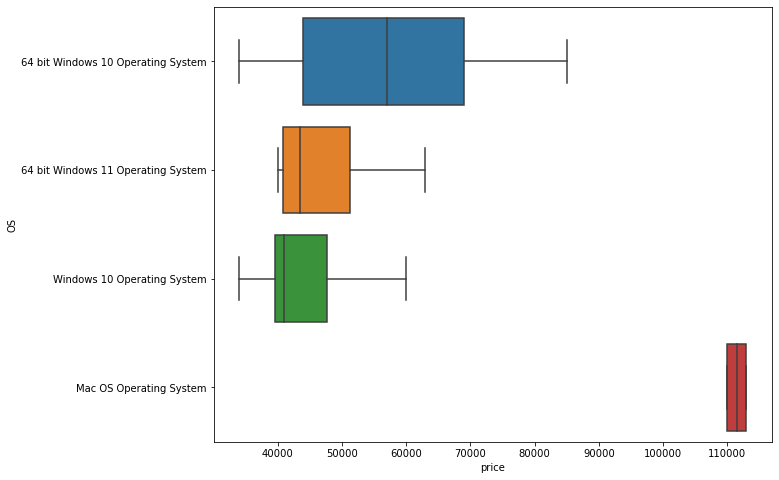

In [61]:
# Box plot of OS and Price
plt.figure(figsize=(10,8))
sns.boxplot(y='OS',x='price', data=df1)
plt.show()

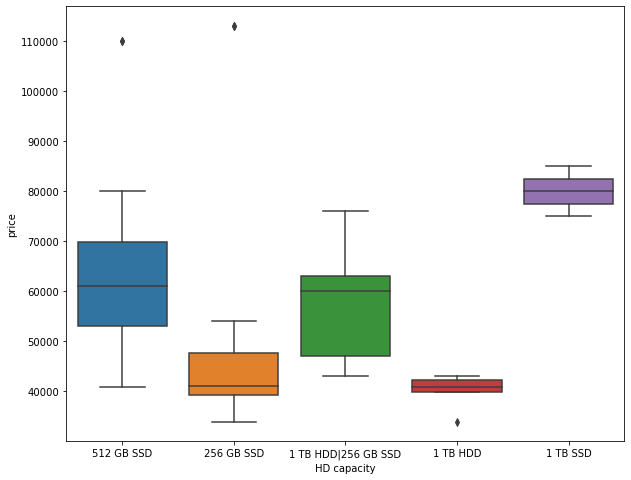

In [62]:
# Boxplot of HDD and price
plt.figure(figsize=(10,8))
sns.boxplot(x='HD capacity',y='price',data=df1)
plt.show()

In [72]:
* Observation
* Only Hard disk has less price
* Laptos which are fitted SSD has higher prices than HDD
* Laptops which are SSD with HDD has higher prices
* 1Tb ssd has hiest price in all


SyntaxError: invalid syntax (<ipython-input-72-42ca9888ed9d>, line 2)

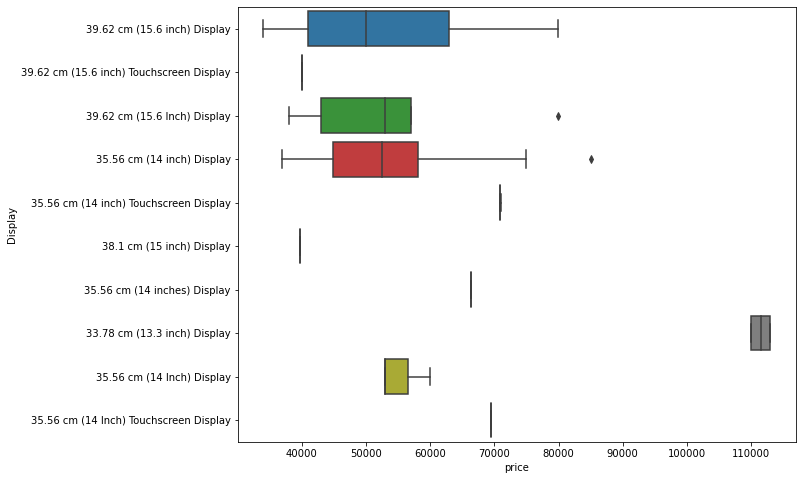

In [63]:
# Box plot of display and price
plt.figure(figsize=(10,8))
sns.boxplot(y='Display',x='price',data=df1)
plt.show()

# Bargraph using Matplotlib

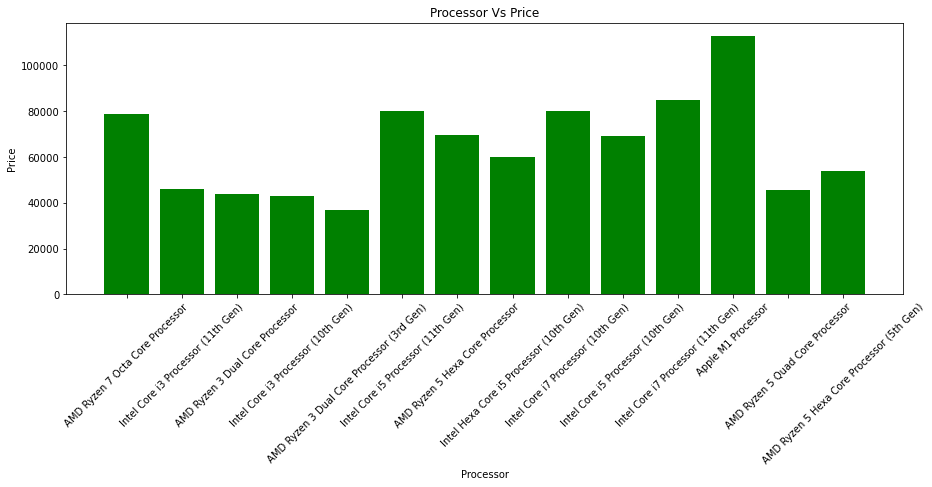

In [64]:
# Bar Graph - Processor Vs Price
# Average price for each CPU so this will show an aggregation
# using plt
plt.figure(figsize=(15,5))
plt.bar(df1['CPU'],df1['price'],color='green')
plt.xticks(rotation=45)
plt.xlabel('Processor')
plt.ylabel('Price')
plt.title('Processor Vs Price')
plt.show()

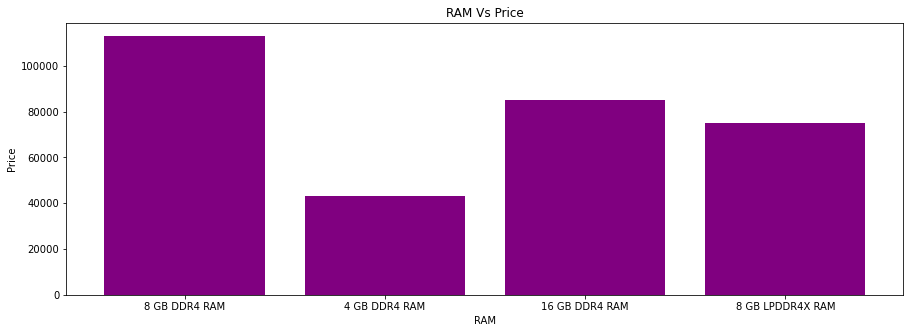

In [65]:
# Bar Graph - RAM Vs Price
plt.figure(figsize=(15,5))
plt.bar(df1['RAM'],df1['price'],color='Purple')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.title('RAM Vs Price')
plt.show()


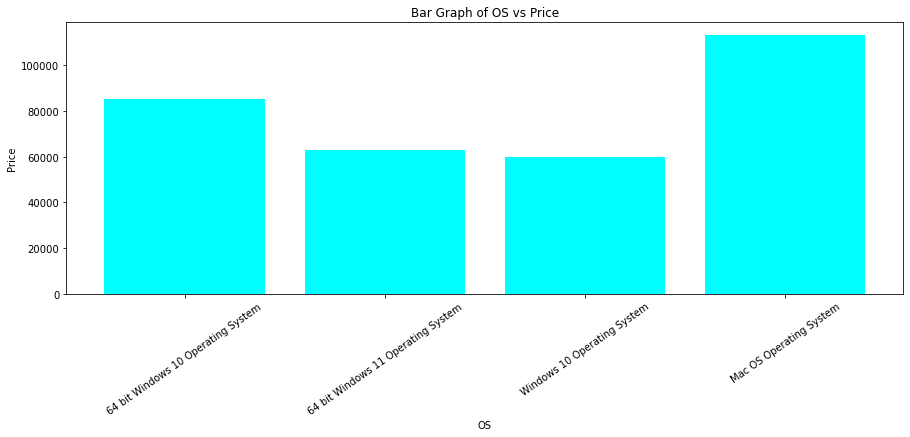

In [66]:
# Bar Graph - OS Vs Price
plt.figure(figsize=(15,5))
plt.bar(df1['OS'],df1['price'],color='cyan')
plt.xticks(rotation=35)
plt.xlabel('OS')
plt.ylabel('Price')
plt.title('Bar Graph of OS vs Price')
plt.show()

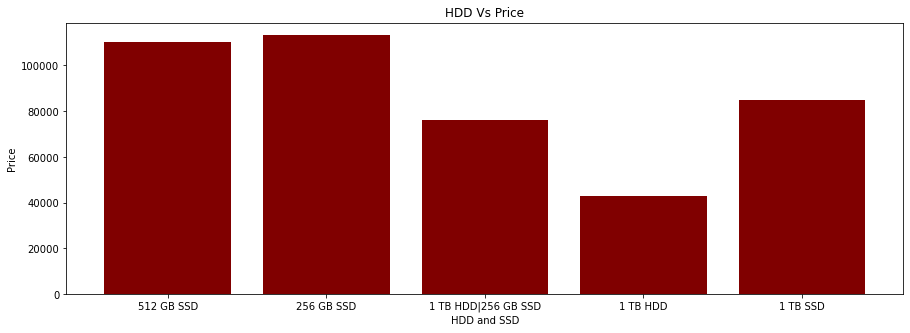

In [67]:
# Bar Graph- HDD Vs Price
plt.figure(figsize=(15,5))
plt.bar(df1['HD capacity'],df1['price'],color='maroon')
plt.xlabel('HDD and SSD')
plt.ylabel('Price')
plt.title('HDD Vs Price')
plt.show()

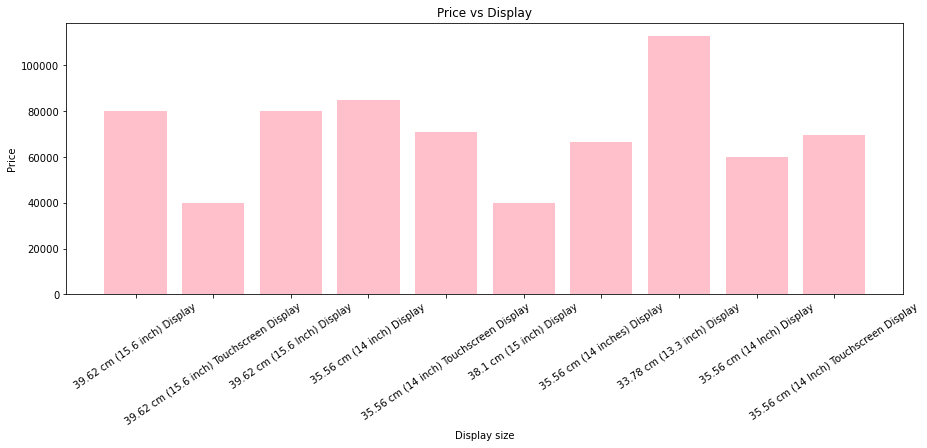

In [68]:
# Bar Graph - Display Vs Price
plt.figure(figsize=(15,5))
plt.bar(df1['Display'],df1['price'],color='pink')
plt.xticks(rotation=34)
plt.xlabel('Display size')
plt.ylabel('Price')
plt.title('Price vs Display')
plt.show()

# Barplot using Seaborn library

* Price versus categorical varable

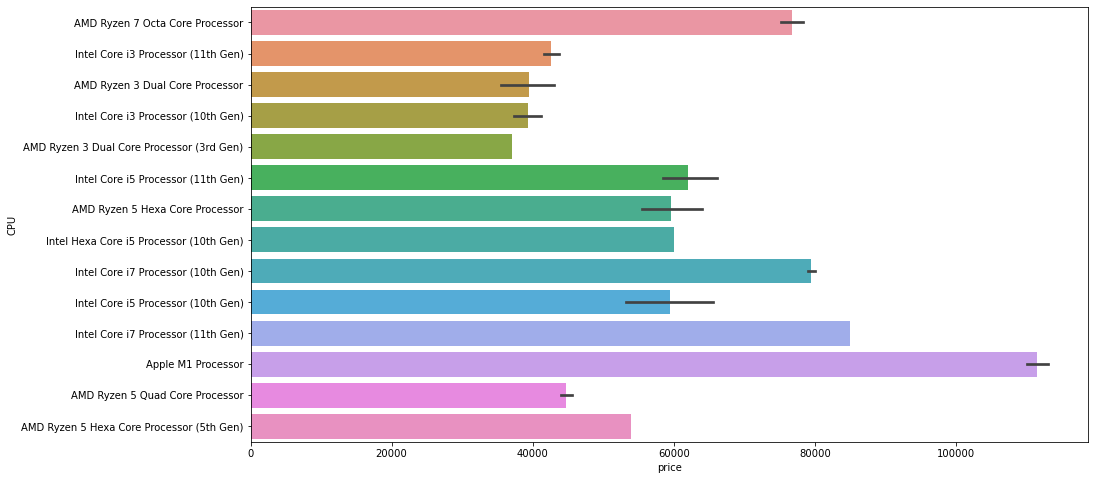

In [69]:
# Bar Plot - Price Vs CPU
# Bar Plot - Price Vs RAM
plt.figure(figsize=(15,8))
#sns.barplot(x=df1.price,y=df1.CPU)
sns.barplot(x='price',y='CPU',data=df1)
plt.show()

* The error bars indicate the variance about the average price for each processor


In [70]:
# Verify
df1[df1['CPU']=='Intel Core i7 Processor (11th Gen)']

,Product Name,CPU,RAM,OS,HD capacity,Display,price,Rating
29,HP Pavilion Core i7 11th Gen - (16 GB/1 TB SSD...,Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,35.56 cm (14 inch) Display,84990.0,4.4


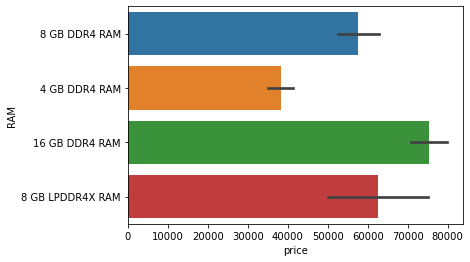

In [77]:
# Bar Plot - Price Vs RAM
sns.barplot(x='price',y='RAM',data=df1)
plt.show()

# Barplot using Seaborn Library

* Categorical variable versus Price

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

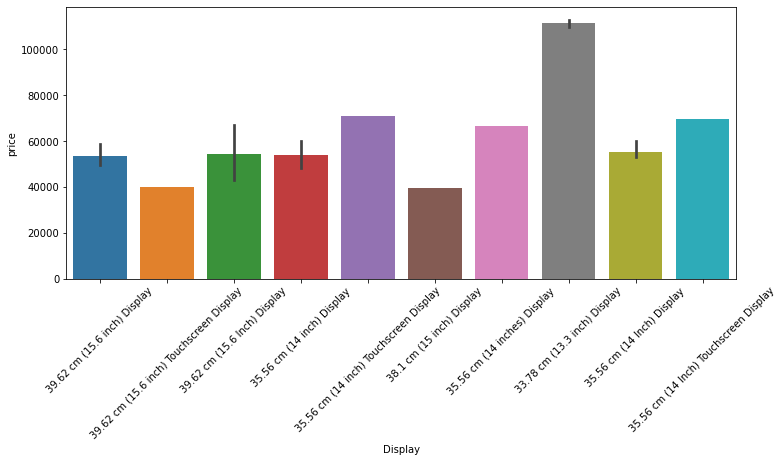

In [80]:
# Barplot- Display  Vs price
plt.figure(figsize=(12,5))
sns.barplot(x=df1['Display'],y=df1['price'])
plt.xticks(rotation=45)

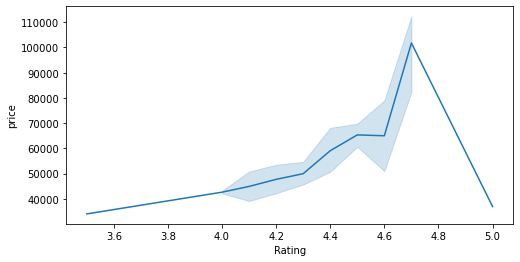

In [81]:
# line plot - Rating Vs Price relation between numeric variable
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.lineplot(x=df['Rating'],y=df['price'])


#Don't draw line plot if they don't make sense: scatter plots may be better
# Line plots are use to see trends profit increasing pre quarter

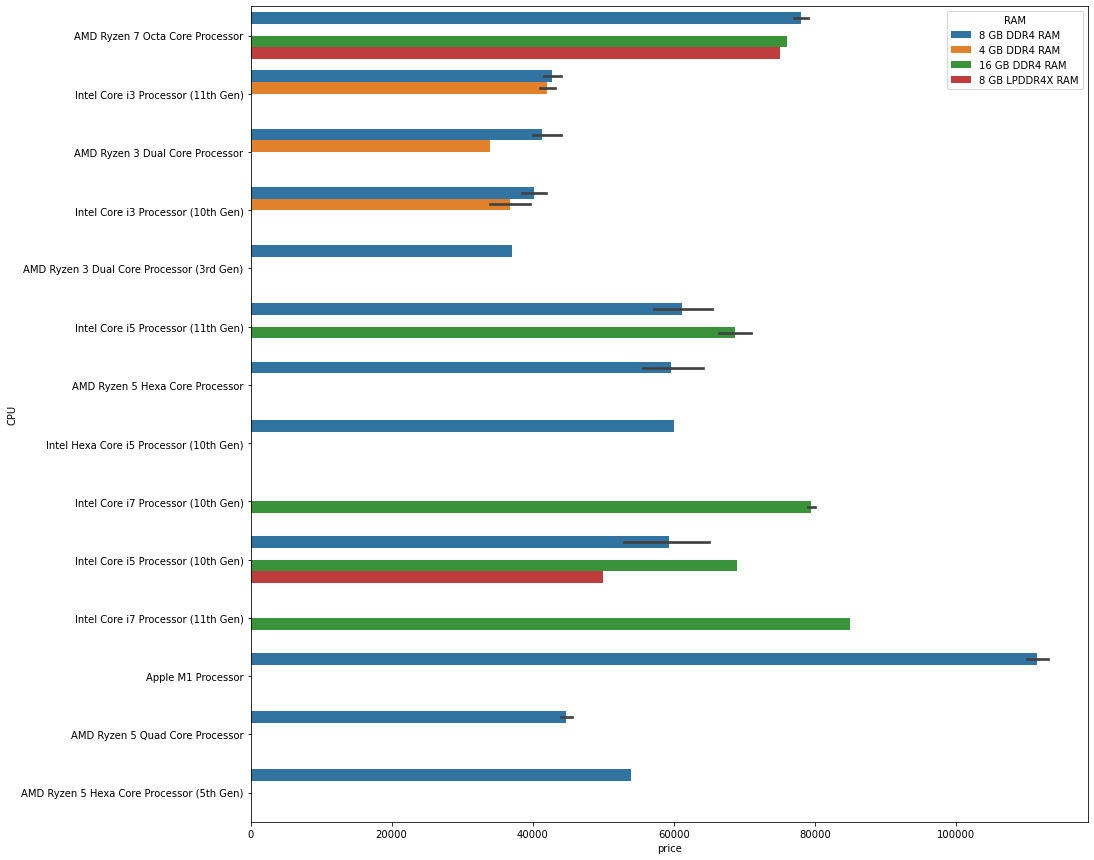

In [90]:
# Price variable with both CPU and RAM
plt.figure(figsize=(15,15))
sns.barplot(x='price',y='CPU', hue='RAM', data=df1)  #factorplot()
plt.show()

In [ ]:
### You learned how to:
* Inspect the HTML structure of your target site with your browser’s tools
* Gain insight into how to decipher the data encoded in URLs
* Download the page’s HTML content using Python’s requests library
* Parse the downloaded HTML with Beautiful Soup to extract relevant information